<a href="https://colab.research.google.com/github/1004516/SE-ALES-Y-SISTEMAS/blob/main/EJERCICIOS%20SYS/EJRCICIO%2025%20NOVIEMBRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterizacion SLITs en el dominio del tiempo

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Análisis de redes eléctricas con elementos Pasivos

- Las [redes eléctricas](https://en.wikipedia.org/wiki/Electrical_network) compuestos de elementos pasivos lineales, como resistencias, condensadores e inductores, pueden describirse mediante ecuaciones diferenciales ordinarias lineales (EDO) con coeficientes constantes.

- Por lo tanto, visto desde la teoría de las señales y los sistemas, pueden interpretarse como un sistema lineal invariante en el tiempo (SLIT).

- Las diferentes formas de caracterizar las propiedades de un SLIT introducidas anteriormente se ilustran con un circuito RLC serie:

![Filtro pasa bajas analógico de segundo orden](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/lowpass.png?raw=1)


- Se asume que no se almacena energía en el condensador ni en el inductor para $t<0$. Además, se supone que $x(t)=0$ para $t<0$.

- Por lo tanto, $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $ t<0$. Para ilustrar, se utilizan los valores de $L=180$, $R=1$, $C=120$ como los parámetros de la red eléctrica.

### Ecuación Diferencial

La ecuación diferencial que describe la relación entrada/salida en el circuito se obtiene al aplicar las [leyes de Kirchhoff](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws). Así, se obtiene la siguiente EDO

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

Se define la EDO con `SymPy`

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()
#se definen variables simbólicas y EDO
t, L, R, C = sym.symbols('t L R C', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(L*C*y.diff(t, 2) + R*C*y.diff(t) + y, x)
ode

     2                                    
    d               d                     
C⋅L⋅───(y(t)) + C⋅R⋅──(y(t)) + y(t) = x(t)
      2             dt                    
    dt                                    

Se guardan los valores de los parámetros (R, L y C) en un diccionario, para su posterior sustitución

In [ ]:
RLC = {R: 1000, L: sym.Rational('180'), C: sym.Rational('120')}
RLC

{C: 120, L: 180, R: 1000}

### Respuesta al Impulso


La red eléctrica pasiva y la EDO que describen su relación de entrada/salida se pueden interpretar como un SLIT. Por lo tanto, el sistema puede caracterizarse por su respuesta al impulso $h(t)$ que se define como la salida del sistema ante una entrada impulso de Dirac $x(t) = \delta(t)$.

Para el sistema dado, la respuesta al impulso se calcula al resolver la EDO

In [ ]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                               ↪
             ⎛        ________________⎞          ⎛       ________________⎞     ↪
             ⎜       ╱   ⎛   2      ⎞ ⎟          ⎜      ╱   ⎛   2      ⎞ ⎟     ↪
             ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟          ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟     ↪
           t⋅⎜-R + ───────────────────⎟       -t⋅⎜R + ───────────────────⎟     ↪
             ⎝              C         ⎠          ⎝             C         ⎠     ↪
           ────────────────────────────       ─────────────────────────────    ↪
                       2⋅L                                 2⋅L                 ↪
h(t) = C₁⋅ℯ                             + C₂⋅ℯ                              +  ↪
                                                                               ↪
                                                                               ↪
                                                                               ↪

↪    ⎛        _____________

Las constantes de integración $C_1$ y $C_2$ deben determinarse a partir de las condiciones iniciales $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

In [ ]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior produce la respuesta al impulso:

In [ ]:
h = solution_h.subs(integration_constants)
h

          ⎛        ________________⎞            ⎛       ________________⎞      
          ⎜       ╱   ⎛   2      ⎞ ⎟            ⎜      ╱   ⎛   2      ⎞ ⎟      
          ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟            ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟      
        t⋅⎜-R + ───────────────────⎟         -t⋅⎜R + ───────────────────⎟      
          ⎝              C         ⎠            ⎝             C         ⎠      
        ────────────────────────────         ─────────────────────────────     
                    2⋅L                                   2⋅L                  
       ℯ                            ⋅θ(t)   ℯ                             ⋅θ(t)
h(t) = ────────────────────────────────── - ───────────────────────────────────
                 ________________                      ________________        
                ╱   ⎛   2      ⎞                      ╱   ⎛   2      ⎞         
              ╲╱  C⋅⎝C⋅R  - 4⋅L⎠                    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠         

Se grafica la respuesta al impulso para los valores $R$, $L$ y $C$ definidos anteriormente en el diccionario

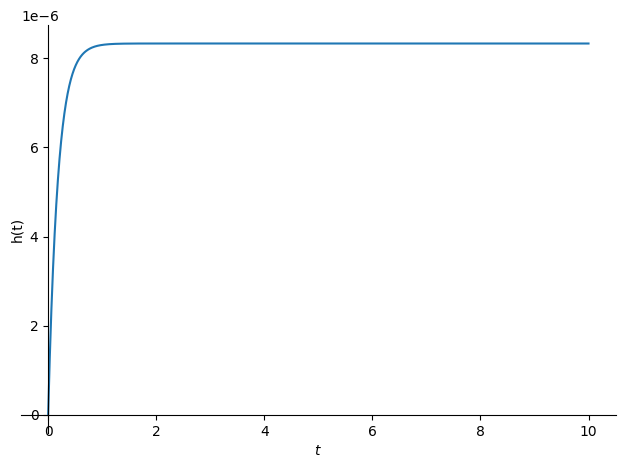

In [ ]:
sym.plot(h.rhs.subs(RLC), (t,0,10), ylabel=r'h(t)');

### Respuesta al Escalón

La respuesta al escalón se obtiene al integrar la respuesta al impulso $h(t)$. Para facilitar la ilustración, esto se realiza con los valores de los parámetros definidos anteriormente.

In [ ]:
tau = sym.symbols('tau', real=True)

he = sym.integrate(h.rhs.subs(RLC).subs(t,tau), (tau,0,t))
he

        ⎛     t⋅(-1000 + √999994)                  ⎞                ⎛          ↪
        ⎜     ───────────────────                  ⎟                ⎜          ↪
        ⎜             360                          ⎟                ⎜          ↪
        ⎜360⋅ℯ                            360      ⎟                ⎜     360  ↪
√999994⋅⎜──────────────────────── - ───────────────⎟⋅θ(t)   √999994⋅⎜───────── ↪
        ⎝    -1000 + √999994        -1000 + √999994⎠                ⎝√999994 + ↪
───────────────────────────────────────────────────────── - ────────────────── ↪
                        119999280                                              ↪

↪              -t⋅(√999994 + 1000) ⎞     
↪              ────────────────────⎟     
↪                      360         ⎟     
↪         360⋅ℯ                    ⎟     
↪ ───── - ─────────────────────────⎟⋅θ(t)
↪  1000        √999994 + 1000      ⎠     
↪ ───────────────────────────────────────
↪       119999280                        

Ahora, se grafica la respuesta al escalón

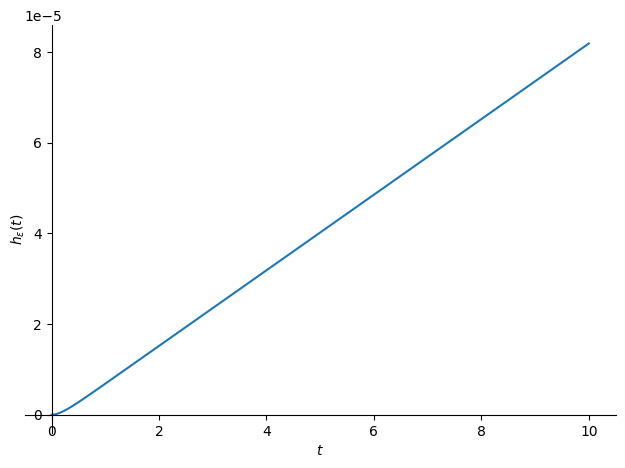

In [ ]:
sym.plot(he, (t,0,10), ylabel=r'$h_\epsilon(t)$');

### Función de Transferencia

Para una señal de entrada exponencial $x(t)=e^{st}$, la función de transferencia $H(s)$ representa el peso de la señal exponencial de salida $y(t)=H(s)\cdot e^{st}$.

La función de transferencia se obtiene introduciendo $x(t)$ y $y(t)$ en la EDO y resolviendo para $H(s)$:

In [ ]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

Las características de transferencia de un SLIT para señales exponenciales armónicas $e^{j \omega t}=\cos(\omega t) + j\sin (\omega t)$ son de especial interés en el análisis de circuitos eléctricos.

Se puede obtener de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$.

La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica (comunmente conocido como [diagrama de Bode](https://en.wikipedia.org/wiki/Bode_plot)).

In [ ]:
#se sustituye s por jm
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

          1           
──────────────────────
       2              
- C⋅L⋅ω  + ⅈ⋅C⋅R⋅ω + 1

Se grafica la magnitud de la función de transferencia $|H(j \omega)|$ para los valores de $R$, $L$ y $C$ definidos anteriormente en el diccionario.

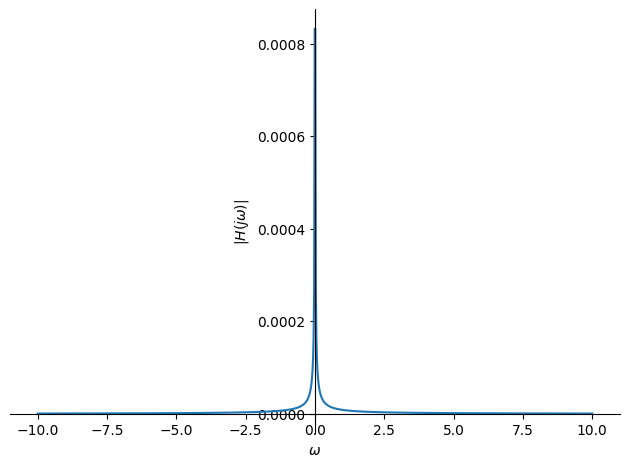

In [ ]:
sym.plot(abs(Hjw.subs(RLC)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Ahora, resulta obvio que las frecuencias bajas pasan a través del sistema y que las frecuencias altas se atenúan. Esto motiva el término 'pasa bajas' para tales sistemas.

Como alternativa a la solución de la EDO, la función de transferencia $H(s)$ se calcula a partir de la respuesta de impulso y se grafica para los valores especificados anteriormente de los parámetros.

In [ ]:
H2 = sym.integrate(h.rhs.subs(RLC)*sym.exp(-s*t), (t,0,sym.oo), conds='none')
H2.simplify()

           1           
───────────────────────
       2               
21600⋅s  + 120000⋅s + 1

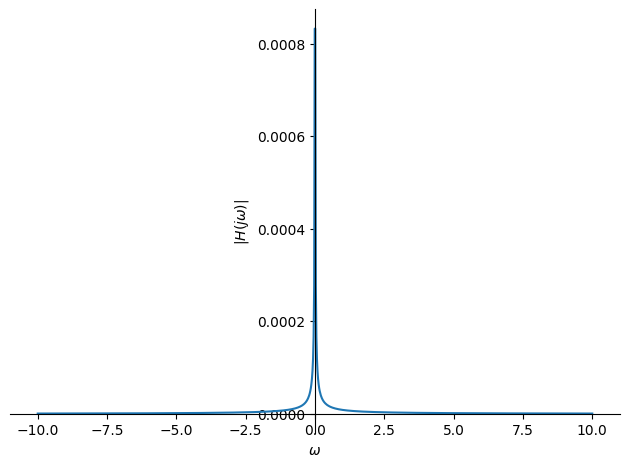

In [ ]:
sym.plot(abs(H2.subs(s, sym.I*w)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

La fase de la función de transferencia $\varphi (j\omega)=\arg \{H(j\omega)\}$ proporciona información sobre la fase agregada a una señal armónica cuando pasa a través del sistema. Se calcula y grafica para los valores específicos de los elementos dados anteriormente.

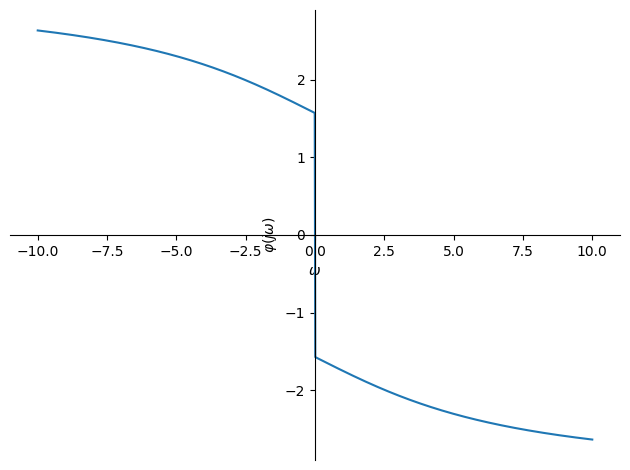

In [ ]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(RLC), (w, -10, 10), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3041395913.py:27: SyntaxWarning: invalid escape sequence '\o'
  axes[0].set_title('Bode Plot of $H(j\omega)$')


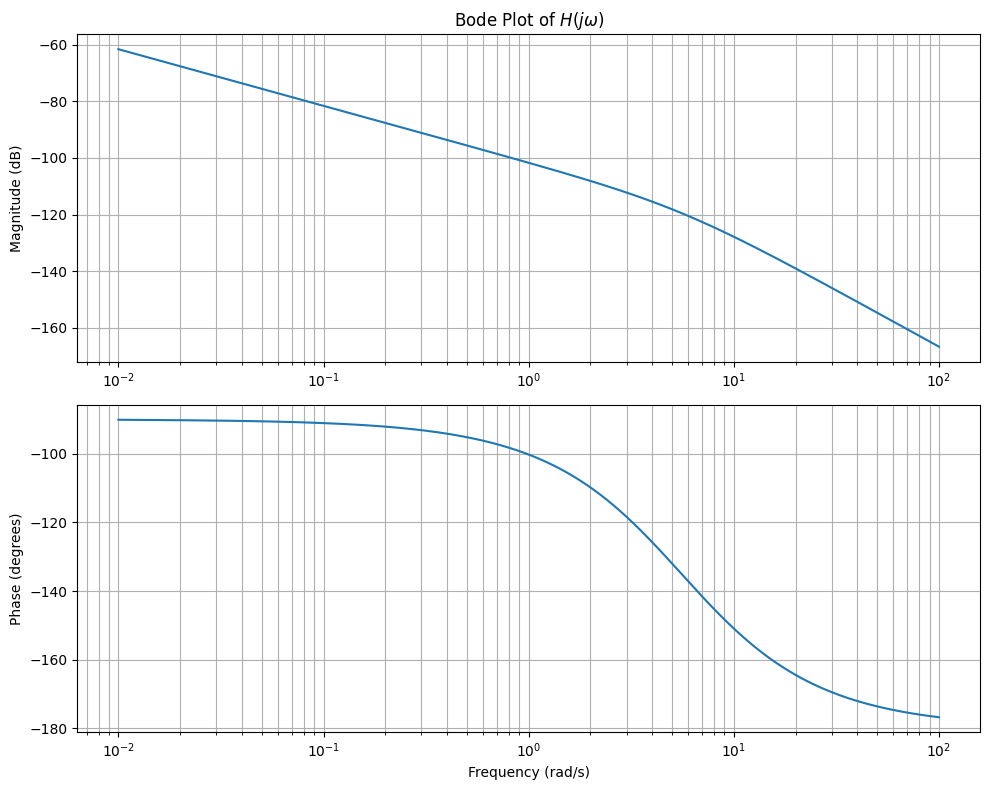

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Substitute R, L, C values into Hjw
Hjw_numeric = Hjw.subs(RLC)

# Create a numerical function from the symbolic expression
H_func = sym.lambdify(w, Hjw_numeric, 'numpy')

# Define frequency range (logarithmic scale is typical for Bode plots)
w_values = np.logspace(-2, 2, 500) # From 10^-2 to 10^2 radians/second

# Calculate the complex frequency response
response = H_func(w_values)

# Calculate magnitude in dB
magnitude_db = 20 * np.log10(np.abs(response))

# Calculate phase in degrees
phase_deg = np.degrees(np.angle(response))

# Create the Bode plot
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Magnitude plot
axes[0].semilogx(w_values, magnitude_db)
axes[0].set_title('Bode Plot of $H(j\omega)$')
axes[0].set_ylabel('Magnitude (dB)')
axes[0].grid(True, which='both', ls='-')

# Phase plot
axes[1].semilogx(w_values, phase_deg)
axes[1].set_xlabel('Frequency (rad/s)')
axes[1].set_ylabel('Phase (degrees)')
axes[1].grid(True, which='both', ls='-')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Substitute RLC values into the transfer function H(s)
H_numeric = H.subs(RLC)
H_numeric

           1           
───────────────────────
       2               
21600⋅s  + 120000⋅s + 1

In [ ]:
# Get the denominator of the transfer function
denom = sym.denom(H_numeric)

# Find the roots of the denominator (poles)
poles = sym.solve(denom, s)

# There are no finite zeros since the numerator is 1
zeros = []

print(f"Poles: {poles}")
print(f"Zeros: {zeros}")

Poles: [-25/9 - sqrt(999994)/360, -25/9 + sqrt(999994)/360]
Zeros: []


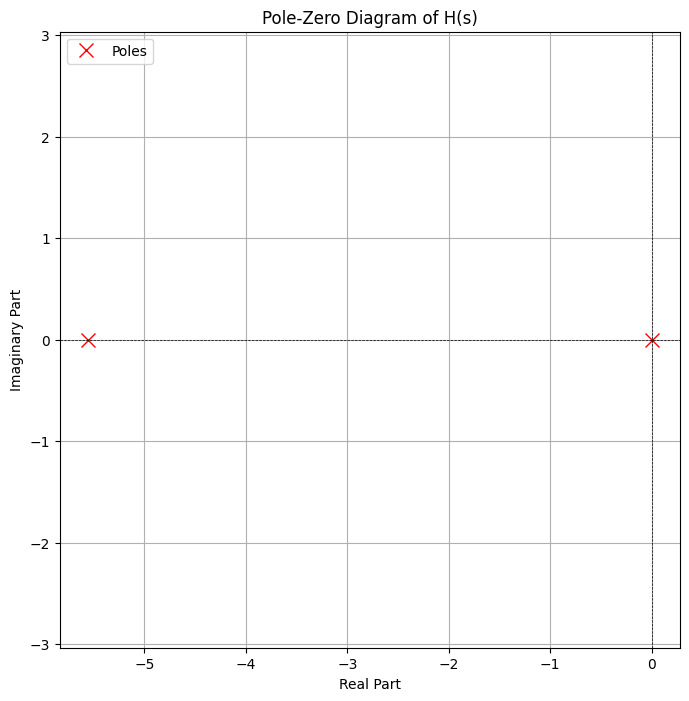

In [ ]:
# Plot the poles and zeros
plt.figure(figsize=(8, 8))

# Plot poles (marked with 'x')
for pole in poles:
    plt.plot(pole.as_real_imag()[0], pole.as_real_imag()[1], 'x', markersize=10, color='red', label='Poles' if pole == poles[0] else "")

# Plot zeros (marked with 'o') - if any
for zero in zeros:
    plt.plot(zero.as_real_imag()[0], zero.as_real_imag()[1], 'o', markersize=10, color='blue', label='Zeros' if zero == zeros[0] else "")

# Add axes for the complex plane
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)

plt.title('Pole-Zero Diagram of H(s)')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.legend()
plt.axis('equal') # Ensure equal scaling for real and imaginary axes
plt.show()

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.